In [7]:
import matplotlib.pyplot as plt

In [8]:
from helper import load_dataset

df = load_dataset("data/concat_data_2015_2024_filled.CSV", resample_rule="ME")
df.head()


,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C),TEMPERATURA
DATA,,,,,,,
2015-01-31,0.709091,831.636364,831.954545,831.454545,18.000000,16.463636,17.231818
2015-02-28,0.709091,831.636364,831.954545,831.454545,18.000000,16.463636,17.231818
2015-03-31,0.709091,831.636364,831.954545,831.454545,18.000000,16.463636,17.231818
2015-04-30,0.644404,831.620255,831.922424,831.436915,17.499954,16.006717,16.753335
2015-05-31,0.113441,833.026747,833.228226,832.814919,12.495027,11.604704,12.049866


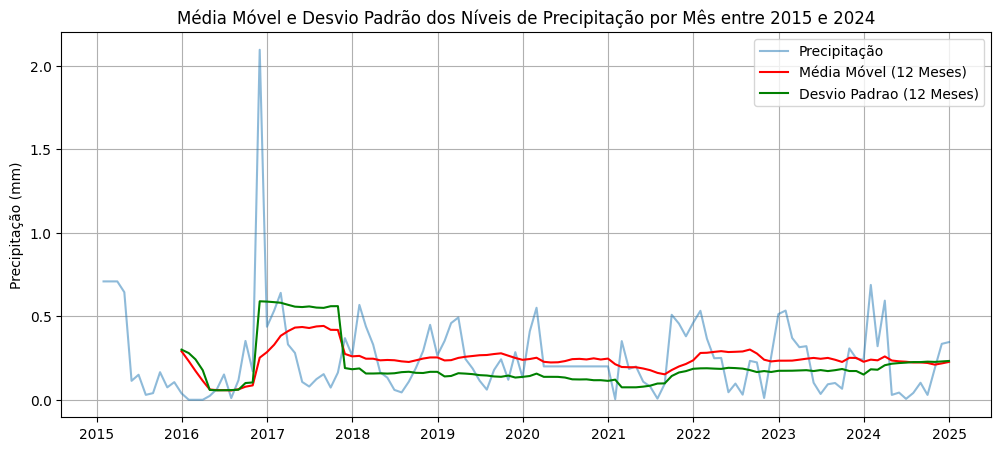

adf_statistic:  -5.562605870674485
p_value:  1.5297396805043646e-06
critical_values:  {'1%': -3.489057523907491, '5%': -2.887246327182993, '10%': -2.5804808802708528}


In [11]:
# check for stationarity

from statsmodels.tsa.stattools import adfuller

# Select the precipitation column
precip_col = "PRECIPITAÇÃO TOTAL HORÁRIO (mm)"
precip_data = df[precip_col]

# Plot rolling mean and standard deviation
plt.figure(figsize=(12, 5))
plt.plot(precip_data, label="Precipitação", alpha=0.5)
plt.plot(precip_data.rolling(window=12).mean(), label="Média Móvel (12 Meses)", color="red")
plt.plot(precip_data.rolling(window=12).std(), label="Desvio Padrao (12 Meses)", color="green")
plt.ylabel("Precipitação (mm)")
plt.grid()
plt.legend()
plt.title("Média Móvel e Desvio Padrão dos Níveis de Precipitação por Mês entre 2015 e 2024")
plt.show()

# Perform ADF test
adf_result = adfuller(precip_data)

# Extract test results
adf_statistic, p_value, _, _, critical_values, _ = adf_result

print("adf_statistic: ", adf_statistic)
print("p_value: ", p_value)
print("critical_values: ", critical_values)

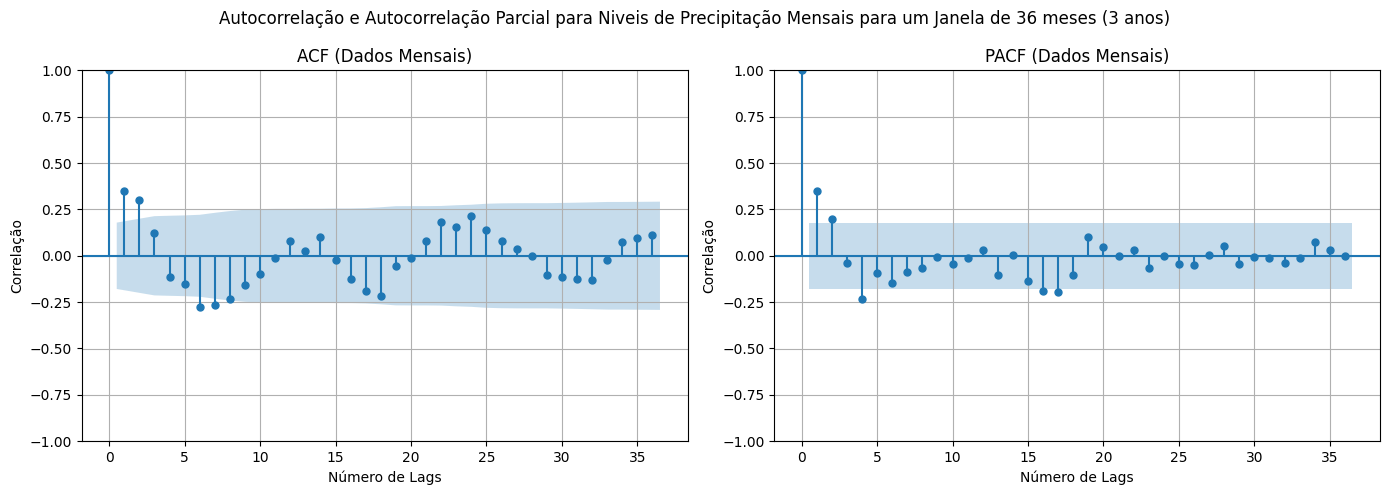

In [12]:
# Plot ACF and PACF for the weekly data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

num_of_lags = 12 * 3 # Up to 3 years of lags

plot_acf(precip_data, lags=num_of_lags, ax=axes[0])
axes[0].set_title("ACF (Dados Mensais)")
axes[0].set_xlabel("Número de Lags")
axes[0].set_ylabel("Correlação")
axes[0].grid()

plot_pacf(precip_data, lags=num_of_lags, ax=axes[1])
axes[1].set_title("PACF (Dados Mensais)")
axes[1].set_xlabel("Número de Lags")
axes[1].set_ylabel("Correlação")
axes[1].grid()

fig.suptitle("Autocorrelação e Autocorrelação Parcial para Niveis de Precipitação Mensais para um Janela de 36 meses (3 anos)")
fig.tight_layout()

plt.show()

In [13]:
# Split data in train and test

features = ["PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB)", "TEMPERATURA"]

endg_train = df["PRECIPITAÇÃO TOTAL HORÁRIO (mm)"][:"2022-12-31"]
endg_test = df["PRECIPITAÇÃO TOTAL HORÁRIO (mm)"]["2023-01-01":]

exog_train = df[features][:"2022-12-31"]
exog_test = df[features]["2023-01-01":]

In [15]:
import pmdarima as pm

model = pm.auto_arima(
    endg_train,
    X=exog_train,
    seasonal=True,
    m=12,                # Seasonal period
    stepwise=True,      # Use stepwise search to speed up
    suppress_warnings=True,
    error_action="ignore"
)

order = model.order
seasonal_order = model.seasonal_order

print(f"Parâmetros ARIMA: {order}, Parâmetros Sasionais: {seasonal_order}")

c:\Users\joao.cardoso\projects\MBA_Sarimax\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\joao.cardoso\projects\MBA_Sarimax\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\joao.cardoso\projects\MBA_Sarimax\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\joao.cardoso\projects\MBA_Sarimax\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\joao.cardoso\projects\MBA_Sarimax\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: '

Parâmetros ARIMA: (2, 0, 0), Parâmetros Sasionais: (0, 0, 0, 12)


In [16]:
from statsmodels.tsa.statespace import sarimax

# Define new SARIMA model for weekly data
model = sarimax.SARIMAX(
    endog=endg_train,
    exog=exog_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
result = model.fit(disp=False)

# Display the model summary
result.summary()


c:\Users\joao.cardoso\projects\MBA_Sarimax\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     PRECIPITAÇÃO TOTAL HORÁRIO (mm)   No. Observations:                   96
Model:                            SARIMAX(2, 0, 0)   Log Likelihood                   2.629
Date:                             Sun, 20 Apr 2025   AIC                              4.742
Time:                                     16:10:52   BIC                             17.459
Sample:                                 01-31-2015   HQIC                             9.879
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB) -9.487e-05      0.000     -0.233      0.816      -0.001       0.001
TEMPERATURA                                              0.0219      0.021      1.066      0.287      -0.018       0.062
ar.L1                                                    0.2226      0.111      2.008      0.045       0.005       0.440
ar.L2                                                    0.1974      0.138      1.425      0.154      -0.074       0.469
sigma2                                                   0.0556      0.004     15.872      0.000       0.049       0.062
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              5785.16
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             5.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

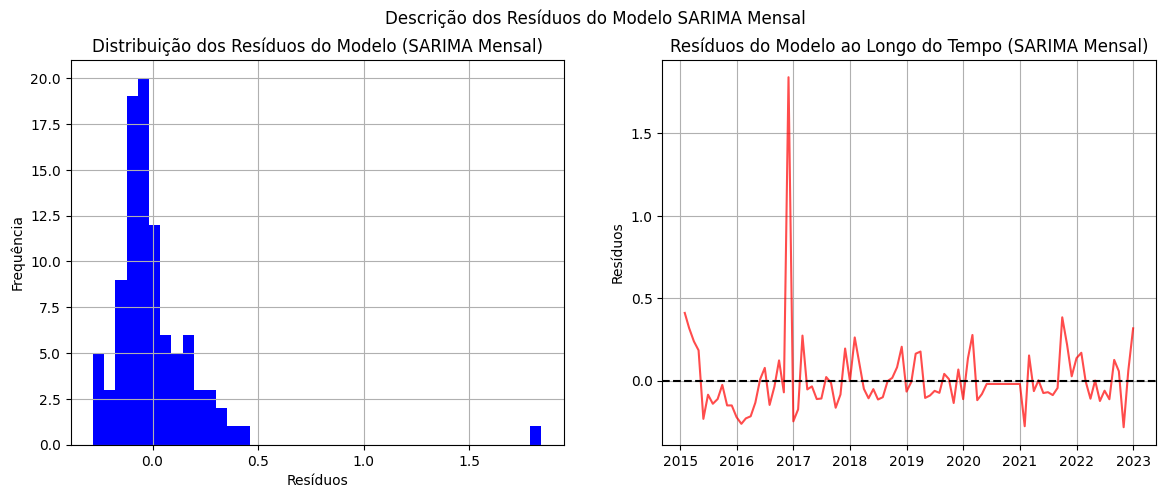

Média dos Resíduos 0.010023982831901685
Desvio Padrão dos Resíduos 0.2386136120963328


In [17]:
import numpy as np

residuals = result.resid
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of residuals
axes[0].hist(residuals, bins=40, color='blue')
axes[0].set_title("Distribuição dos Resíduos do Modelo (SARIMA Mensal)")
axes[0].set_xlabel("Resíduos")
axes[0].set_ylabel("Frequência")
axes[0].grid()

# Residuals over time
axes[1].plot(residuals, color='red', alpha=0.7)
axes[1].axhline(0, linestyle="--", color="black")
axes[1].set_title("Resíduos do Modelo ao Longo do Tempo (SARIMA Mensal)")
axes[1].set_ylabel("Resíduos")
axes[1].grid()

fig.suptitle("Descrição dos Resíduos do Modelo SARIMA Mensal")

plt.show()

# Check residuals mean and standard deviation
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)

print("Média dos Resíduos", residuals_mean) 
print("Desvio Padrão dos Resíduos", residuals_std) 


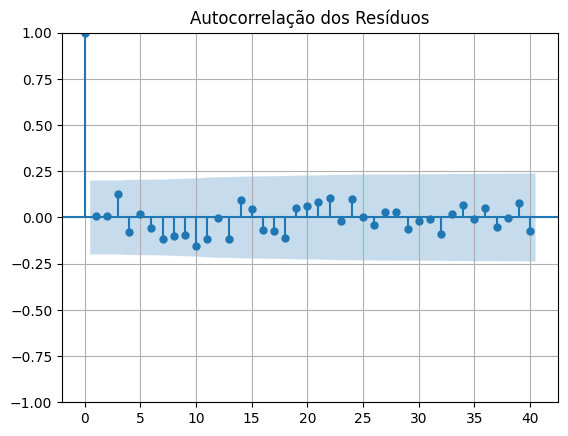

      lb_stat  lb_pvalue
10   8.723168   0.558562
20  16.435263   0.689281
30  20.999560   0.887902


In [18]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# ACF Plot (Autocorrelation of Residuals)
plot_acf(residuals, lags=40)
plt.title("Autocorrelação dos Resíduos")
plt.grid()
plt.show()

# Ljung-Box Test for autocorrelation
lb_test = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print(lb_test)

In [19]:
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(residuals)
print(f"ARCH Test P-Value: {arch_test[1]:.9f}")

ARCH Test P-Value: 0.999999988


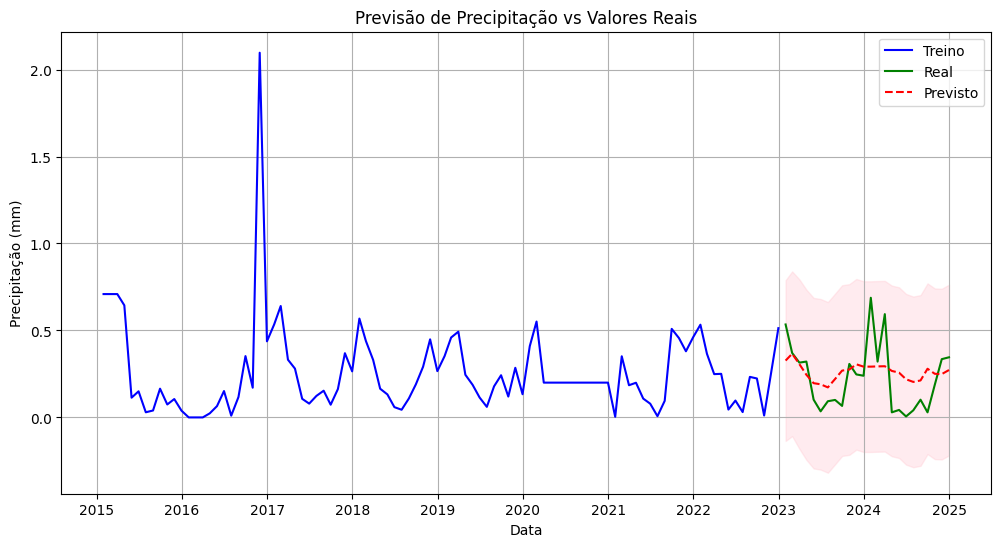

MAE: 0.13
RMSE: 0.17
R²: 0.21


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fazer previsões para o período de teste
forecast = result.get_forecast(steps=len(endg_test), exog=exog_test)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Calcular métricas de avaliação
mae = mean_absolute_error(endg_test, forecast_values)
rmse = np.sqrt(mean_squared_error(endg_test, forecast_values))
r2 = r2_score(endg_test, forecast_values)

# Plotar resultados
plt.figure(figsize=(12, 6))
plt.plot(endg_train.index, endg_train, label='Treino', color='blue')
plt.plot(endg_test.index, endg_test, label='Real', color='green')
plt.plot(endg_test.index, forecast_values, label='Previsto', color='red', linestyle='--')
plt.fill_between(endg_test.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Previsão de Precipitação vs Valores Reais')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir métricas
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

## Interpretação dos Resultados

1. **Teste de Estacionariedade (ADF Test - `adf_result`)**:
    - O valor estatístico do teste ADF (`adf_statistic`) é -5.56, e o valor-p (`p_value`) é 1.53e-06.
    - Como o valor-p é menor que 0.05, rejeitamos a hipótese nula de que a série não é estacionária. Isso indica que a série de precipitação é estacionária.

2. **ACF e PACF**:
    - Os gráficos de ACF e PACF mostram a autocorrelação e a autocorrelação parcial da série de precipitação. Esses gráficos ajudam a identificar padrões sazonais e a ordem dos modelos ARIMA/SARIMA.

3. **Divisão dos Dados**:
    - Os dados foram divididos em conjuntos de treino (`endg_train`, `exog_train`) e teste (`endg_test`, `exog_test`). O conjunto de treino vai até 2022, e o conjunto de teste cobre 2023-2024.

4. **Modelo ARIMA/SARIMA**:
    - O modelo SARIMA foi ajustado com os parâmetros `(2, 0, 0)` para o modelo ARIMA e `(0, 0, 0, 12)` para a sazonalidade.
    - O modelo foi treinado com os dados de treino e gerou previsões para o conjunto de teste.

5. **Resíduos do Modelo**:
    - A análise dos resíduos mostra que eles têm uma média próxima de zero (`residuals_mean = 0.01`) e um desvio padrão de 0.2386 (`residuals_std`).
    - O histograma e o gráfico dos resíduos ao longo do tempo indicam que os resíduos estão bem distribuídos, sugerindo que o modelo ajustou bem os dados.

6. **Autocorrelação dos Resíduos**:
    - O gráfico de ACF dos resíduos mostra que não há autocorrelação significativa, indicando que o modelo capturou bem os padrões da série.
    - O teste de Ljung-Box (`lb_test`) confirma que não há autocorrelação significativa nos resíduos (valores-p > 0.05).

7. **Teste ARCH**:
    - O teste ARCH (`arch_test`) tem um valor-p muito alto (0.9999), indicando que não há heterocedasticidade nos resíduos.

8. **Previsões e Avaliação**:
    - As previsões do modelo foram comparadas com os valores reais do conjunto de teste.
    - Métricas de avaliação:
      - MAE (Erro Absoluto Médio): 0.1345
      - RMSE (Raiz do Erro Quadrático Médio): 0.1665
      - R²: 0.2131 (o modelo explica cerca de 21% da variabilidade dos dados de teste).
    - O gráfico mostra que as previsões seguem a tendência geral dos dados reais, mas há desvios em alguns pontos.

**Conclusão**:
O modelo SARIMA ajustado é razoável para prever a precipitação, mas há espaço para melhorias, especialmente no ajuste da sazonalidade e na explicação da variabilidade dos dados (R² baixo).